In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("AirPassengers.csv")

In [3]:
def year_fraction_to_datetime(year_float):
    year = int(year_float)
    fraction = year_float - year
    month = int(round(fraction * 12)) + 1
    if month > 12:
        year += 1
        month = 12
    return pd.Timestamp(year=year, month=month, day=1)

df["Date"] = df["Time"].apply(year_fraction_to_datetime)
ts = df.set_index("Date")["AirPassengers"].asfreq("MS")

In [4]:
ts_raw  = ts
ts_sqrt = np.sqrt(ts)
ts_log  = np.log(ts)

In [5]:
diff_raw  = ts_raw.diff().dropna()
diff_sqrt = ts_sqrt.diff().dropna()
diff_log  = ts_log.diff().dropna()

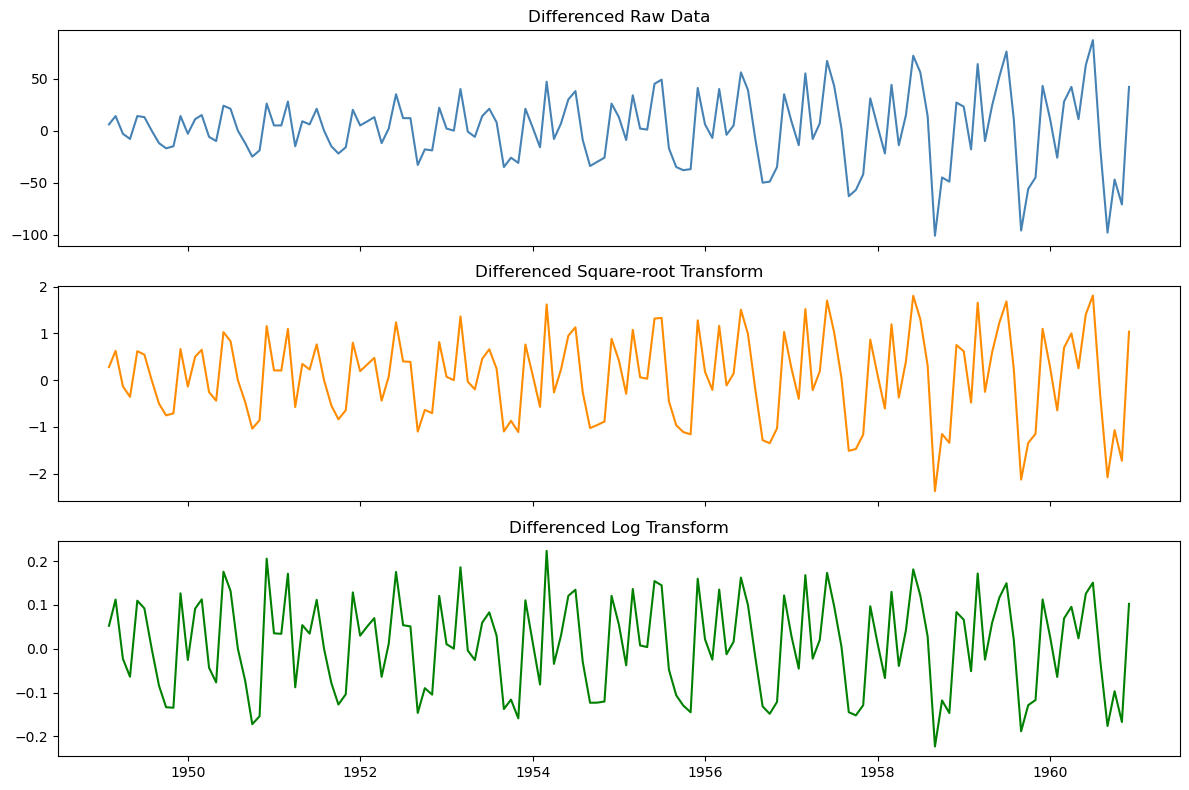

In [6]:
fig, axes = plt.subplots(3, 1, figsize=(12,8), sharex=True)

axes[0].plot(diff_raw, color="steelblue")
axes[0].set_title("Differenced Raw Data")

axes[1].plot(diff_sqrt, color="darkorange")
axes[1].set_title("Differenced Square-root Transform")

axes[2].plot(diff_log, color="green")
axes[2].set_title("Differenced Log Transform")

plt.tight_layout()
plt.show()